In [31]:

import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer 
from sklearn.model_selection import KFold,StratifiedKFold,RepeatedKFold,RepeatedStratifiedKFold

from sklearn.metrics import roc_auc_score as auc
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

In [4]:
train = pd.read_csv('train_data.csv')
test =pd.read_csv('test_data.csv')
sub =pd.read_csv('sample_submission.csv')
vardef =pd.read_csv('VariableDescription.csv')

In [6]:
train_copy = train.copy()
test_copy = test.copy()

In [7]:
train.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,.,1053,0
3,H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,.,1053,0
4,H5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0


In [8]:
train.columns 

Index(['Customer Id', 'YearOfObservation', 'Insured_Period', 'Residential',
       'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
       'Building Dimension', 'Building_Type', 'Date_of_Occupancy',
       'NumberOfWindows', 'Geo_Code', 'Claim'],
      dtype='object')

In [9]:
test.columns

Index(['Customer Id', 'YearOfObservation', 'Insured_Period', 'Residential',
       'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
       'Building Dimension', 'Building_Type', 'Date_of_Occupancy',
       'NumberOfWindows', 'Geo_Code'],
      dtype='object')

In [14]:
print(train.dtypes)

v=""
for i in range(1,20):
    v += "***"
print(v ,end="")
print("\n")

print(test.dtypes)

Customer Id            object
YearOfObservation       int64
Insured_Period        float64
Residential             int64
Building_Painted       object
Building_Fenced        object
Garden                 object
Settlement             object
Building Dimension    float64
Building_Type           int64
Date_of_Occupancy     float64
NumberOfWindows        object
Geo_Code               object
Claim                   int64
dtype: object
*********************************************************

Customer Id            object
YearOfObservation       int64
Insured_Period        float64
Residential             int64
Building_Painted       object
Building_Fenced        object
Garden                 object
Settlement             object
Building Dimension    float64
Building_Type           int64
Date_of_Occupancy     float64
NumberOfWindows        object
Geo_Code               object
dtype: object


In [18]:
print(train.shape)

print("\n")
v=""
for i in range(1,5):
    v += "***"
print(v ,end="")
print("\n")

print(test.shape)

(7160, 14)


************

(3069, 13)


0    5526
1    1634
Name: Claim, dtype: int64
0    0.771788
1    0.228212
Name: Claim, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


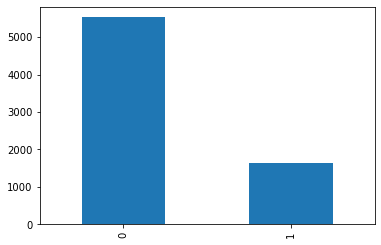

In [22]:
#univariate analysis
print(train.Claim.value_counts())
print(train.Claim.value_counts(normalize=True))
print(train.Claim.value_counts().plot.bar())

we can note that 77.178% of the claims were not accepted while 22.82% were accepted.

In [23]:
train.describe(include=['object'])

,Customer Id,Building_Painted,Building_Fenced,Garden,Settlement,NumberOfWindows,Geo_Code
count,7160,7160,7160,7153,7160,7160,7058
unique,7160,2,2,2,2,11,1307
top,H16954,V,N,O,R,.,6088
freq,1,5382,3608,3602,3610,3551,143


Let us have a look at Categorical Data and first , let us start with ordinal data

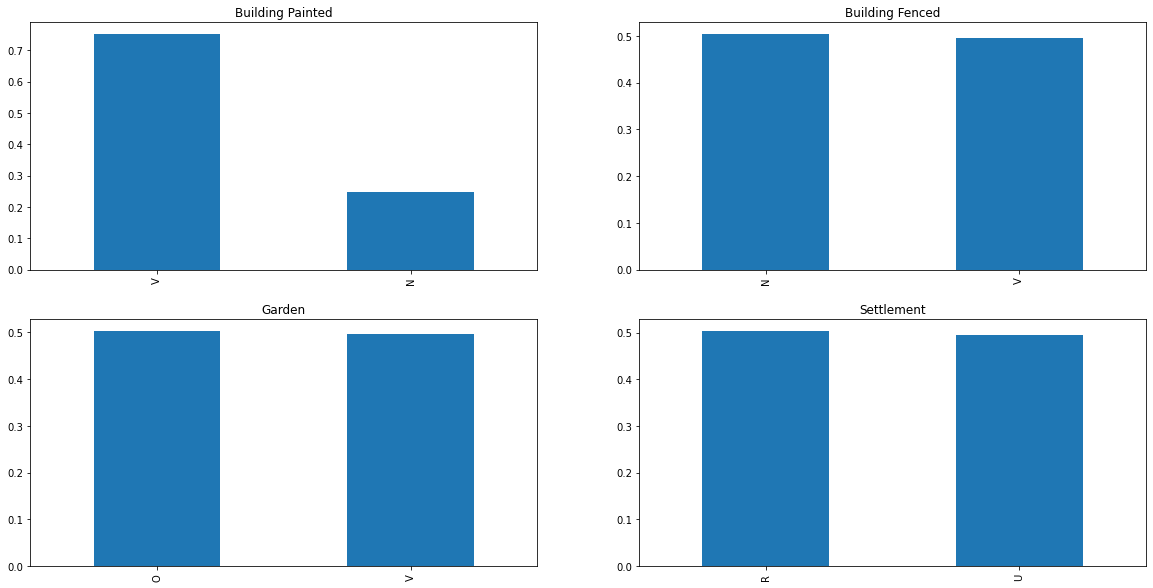

In [24]:
plt.figure(1)
plt.subplot(221)
train['Building_Painted'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Building Painted')
plt.subplot(222)
train['Building_Fenced'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Building Fenced')
plt.subplot(223)
train['Garden'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Garden')
plt.subplot(224)
train['Settlement'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Settlement')
plt.show()

- Almost 72% of the buildings in this dataset are not painted 
- The rest of the categorical ordinal features do not provide enough information as they all seem to have equal variations.

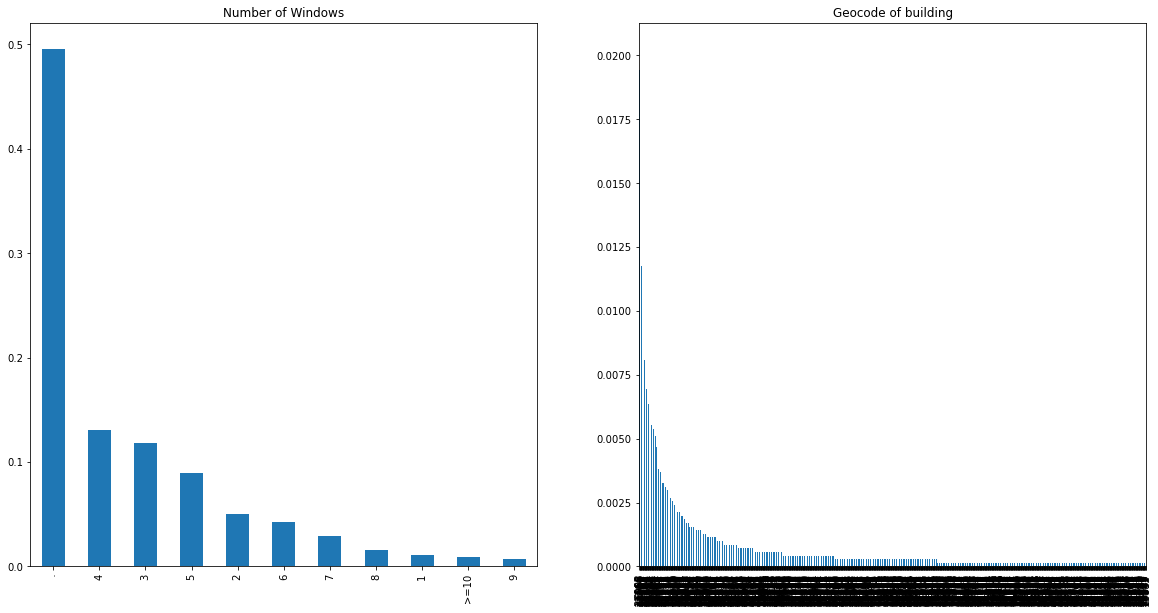

In [25]:
plt.figure(1)
plt.subplot(121)
train['NumberOfWindows'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Number of Windows')
plt.subplot(122)
train['Geo_Code'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Geocode of building')
plt.show()

- Number of windows has a large number of missing values that we need to take care of 
- For the Geocode of the builidng , we have a lot of codes , so binning them would make our work easier 

In [26]:
train.describe()

,YearOfObservation,Insured_Period,Residential,Building Dimension,Building_Type,Date_of_Occupancy,Claim
count,7160.000000,7160.000000,7160.000000,7054.000000,7160.000000,6652.000000,7160.000000
mean,2013.669553,0.909758,0.305447,1883.727530,2.186034,1964.456404,0.228212
std,1.383769,0.239756,0.460629,2278.157745,0.940632,36.002014,0.419709
min,2012.000000,0.000000,0.000000,1.000000,1.000000,1545.000000,0.000000
25%,2012.000000,0.997268,0.000000,528.000000,2.000000,1960.000000,0.000000
50%,2013.000000,1.000000,0.000000,1083.000000,2.000000,1970.000000,0.000000
75%,2015.000000,1.000000,1.000000,2289.750000,3.000000,1980.000000,0.000000
max,2016.000000,1.000000,1.000000,20940.000000,4.000000,2016.000000,1.000000


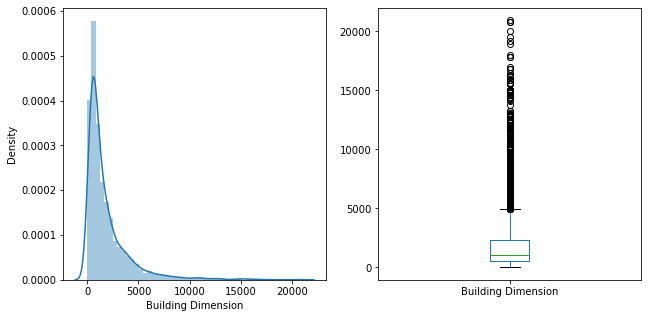

In [32]:
plt.figure(1)
plt.subplot(131)
sns.distplot(train['Building Dimension'])
plt.subplot(132)
train['Building Dimension'].plot.box(figsize=(16,5))
plt.show()

- We can infer that our data is distributed towards the left , so the data is normally distributed 

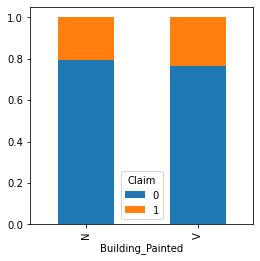

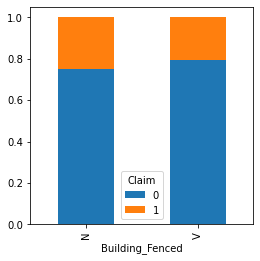

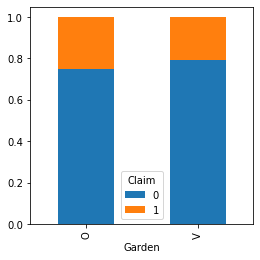

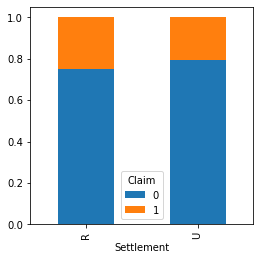

In [33]:
Bp = pd.crosstab(train['Building_Painted'],train['Claim'])
Bf = pd.crosstab(train['Building_Fenced'],train['Claim'])
Gn =  pd.crosstab(train['Garden'],train['Claim'])
St =  pd.crosstab(train['Settlement'],train['Claim'])


Bp.div(Bp.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

Bf.div(Bf.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

Gn.div(Gn.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

St.div(St.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

- Building Painted : Buildings which are not painted received higher claim compared to the ones which were painted
- Building Fenced : Buildings which were fenced received higher claim than those which were not painted 
- Garden: Buildings with no garden had higher claim during the insurance period 
- Settlement : Buildings in rural areas tend to have higher claim comapred to urban areas

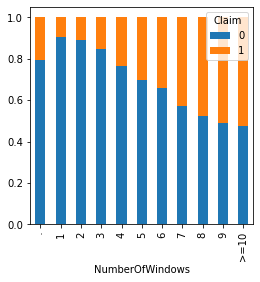

In [35]:
NoW =  pd.crosstab(train['NumberOfWindows'],train['Claim'])
Gc =  pd.crosstab(train['Geo_Code'],train['Claim'])

NoW.div(NoW.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()



- We can observe that the larger the number of windows the building has , the larger the probability a building gains to claim during the insurance period 

<AxesSubplot:xlabel='Claim'>

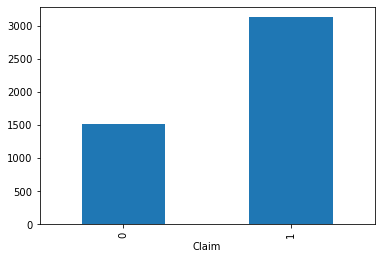

In [36]:
train.groupby('Claim')['Building Dimension'].mean().plot.bar()

 - Buildings with a building dimension> 1500 m2 tend to receive claim during the insurance period 

<AxesSubplot:>

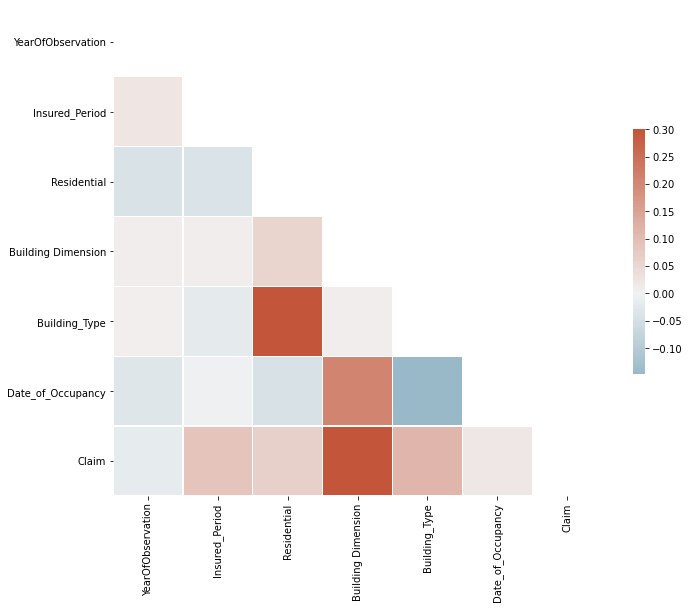

In [37]:
#lets check on correlation
#correlation heatmap 
# Compute the correlation matrix
corr = train.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

- We can observe correlation among the following variables:
- * Building_type and Residential 
- * Building Dimension and Claim
- * Date of Occupancy and Building Dimension
- * Building_type and Date of Occupancy (negatively correlated)

In [38]:
# Missing Value Imputation 
print(train.isnull().sum())

print("\n")
v=""
for i in range(1,5):
    v += "***"
print(v ,end="")
print("\n")

print(test.isnull().sum())

Customer Id             0
YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  7
Settlement              0
Building Dimension    106
Building_Type           0
Date_of_Occupancy     508
NumberOfWindows         0
Geo_Code              102
Claim                   0
dtype: int64


************

Customer Id             0
YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  4
Settlement              0
Building Dimension     13
Building_Type           0
Date_of_Occupancy     728
NumberOfWindows         0
Geo_Code               13
dtype: int64


In [40]:
train['Garden'].fillna(train['Garden'].mode()[0],inplace=True)
test['Garden'].fillna(test['Garden'].mode()[0],inplace=True)

train['Building Dimension'].fillna(train['Building Dimension'].median(),inplace=True)
test['Building Dimension'].fillna(test['Building Dimension'].median(),inplace=True)

train['Date_of_Occupancy'].fillna(train['Date_of_Occupancy'].median(),inplace=True)
test['Date_of_Occupancy'].fillna(test['Date_of_Occupancy'].median(),inplace=True)

train['Geo_Code'].fillna(train['Geo_Code'].mode()[0],inplace=True)
test['Geo_Code'].fillna(test['Geo_Code'].mode()[0],inplace=True)

In [58]:
train['NumberOfWindows'].replace('   .', 0,inplace=True)
test['NumberOfWindows'].replace('   .', 0, inplace=True)



In [43]:
train['NumberOfWindows'].replace('>=10', 10,inplace=True)
test['NumberOfWindows'].replace('>=10', 10, inplace=True)



In [44]:
#Attempting outlier treatment on Building Dimension
kurt = train.kurt()
kurt


YearOfObservation     -1.134893
Insured_Period         6.370141
Residential           -1.286394
Building Dimension    13.714803
Building_Type         -0.540189
Date_of_Occupancy     23.306528
Claim                 -0.321809
dtype: float64

-0.29795166799085987


<AxesSubplot:>

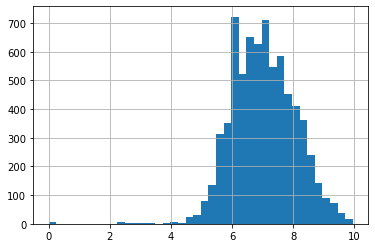

In [54]:
train['Building Dimension'] = np.log(train['Building Dimension'])
print(train['Building Dimension'].skew())
train['Building Dimension'].hist(bins=40)

-0.01696414648245517


<AxesSubplot:>

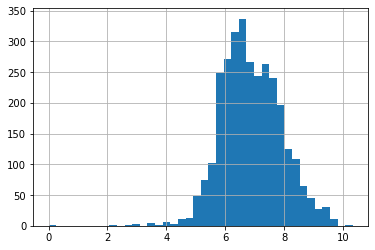

In [55]:
test['Building Dimension'] = np.log(test['Building Dimension'])
print(test['Building Dimension'].skew())
test['Building Dimension'].hist(bins=40)

In [62]:
#dealing with categorical data 
lb= LabelBinarizer()
train['Building_Painted'] = lb.fit_transform(train['Building_Painted'])
train['Building_Fenced'] = lb.fit_transform(train['Building_Fenced'])
train['Garden'] = lb.fit_transform(train['Garden'])
train['Settlement']= lb.fit_transform(train['Settlement'])


test['Building_Painted'] = lb.fit_transform(test['Building_Painted'])
test['Building_Fenced'] = lb.fit_transform(test['Building_Fenced'])
test['Garden'] = lb.fit_transform(test['Garden'])
test['Settlement']= lb.fit_transform(test['Settlement'])

In [67]:
train['NumberOfWindows']= train['NumberOfWindows'].astype('int64')

test['NumberOfWindows']= test['NumberOfWindows'].astype('int64')


In [68]:
train.describe(include=['object'])

,Customer Id,Geo_Code
count,7160,7160
unique,7160,1307
top,H16954,6088
freq,1,245


In [72]:
train.Date_of_Occupancy = train.Date_of_Occupancy.astype('int64')
test.Date_of_Occupancy = test.Date_of_Occupancy.astype('int64')

In [75]:
train.columns

Index(['Customer Id', 'YearOfObservation', 'Insured_Period', 'Residential',
       'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
       'Building Dimension', 'Building_Type', 'Date_of_Occupancy',
       'NumberOfWindows', 'Geo_Code', 'Claim'],
      dtype='object')

In [76]:
train_id = train['Customer Id']
test_id =  test['Customer Id']

geocode_train = train['Geo_Code']
geocode_test = train['Geo_Code']


targets = train['Claim']

In [77]:
X = train.drop(['Customer Id','Geo_Code','Claim'],axis=1)
test_c =test.drop(['Geo_Code'],axis=1)

In [78]:
X.shape

(7160, 11)

In [80]:
test_c =test_c.drop(['Customer Id'],axis=1)

In [81]:
test_c.shape

(3069, 11)

In [83]:
X_train,X_test,y_train,y_test =train_test_split(X,targets,random_state=23,test_size=0.25)


In [85]:
#let us run a couple of models and find out their performances on the data .
from sklearn.metrics import accuracy_score
mlp = MLPClassifier()
mlp.fit(X_train,y_train)
mlp_preds =mlp.predict(X_test)

print("Accuracy score for this model is :",accuracy_score(y_test,mlp_preds))
print("AUC score for this curve is :",auc(y_test,mlp_preds))

Accuracy score for this model is : 0.7558659217877095
AUC score for this curve is : 0.5691728651022951


In [86]:
adc = AdaBoostClassifier()

adc.fit(X_train,y_train)
adc_preds =adc.predict(X_test)

print("Accuracy score for this model is :",accuracy_score(y_test,adc_preds))
print("AUC score for this curve is :",auc(y_test,adc_preds))

Accuracy score for this model is : 0.7932960893854749
AUC score for this curve is : 0.5680542593637825


In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [87]:
etc= ExtraTreesClassifier()

etc.fit(X_train,y_train)
etc_preds =etc.predict(X_test)

print("Accuracy score for this model is :",accuracy_score(y_test,etc_preds))
print("AUC score for this curve is :",auc(y_test,etc_preds))

Accuracy score for this model is : 0.741340782122905
AUC score for this curve is : 0.5704786812932983


In [88]:
gbc =GradientBoostingClassifier()

gbc.fit(X_train,y_train)
gbc_preds =gbc.predict(X_test)

print("Accuracy score for this model is :",accuracy_score(y_test,gbc_preds))
print("AUC score for this curve is :",auc(y_test,gbc_preds))

Accuracy score for this model is : 0.794413407821229
AUC score for this curve is : 0.5716364056338238


In [89]:
rfc =RandomForestClassifier()


rfc.fit(X_train,y_train)
rfc_preds =rfc.predict(X_test)

print("Accuracy score for this model is :",accuracy_score(y_test,rfc_preds))
print("AUC score for this curve is :",auc(y_test,rfc_preds))

Accuracy score for this model is : 0.7603351955307263
AUC score for this curve is : 0.5777566040582756


In [91]:
est =[('rfc',rfc),('gbc',gbc),('etc',etc),('adc',adc)]

stc =StackingClassifier(estimators =est)
stc.fit(X_train,y_train)
stc_preds =stc.predict(X_test)

print("Accuracy score for this model is :",accuracy_score(y_test,stc_preds))
print("AUC score for this curve is :",auc(y_test,stc_preds))

Accuracy score for this model is : 0.7983240223463687
AUC score for this curve is : 0.5712480137995526


In [92]:
knn = KNeighborsClassifier()


knn.fit(X_train,y_train)
knn_preds =knn.predict(X_test)

print("Accuracy score for this model is :",accuracy_score(y_test,knn_preds))
print("AUC score for this curve is :",auc(y_test,knn_preds))

Accuracy score for this model is : 0.758659217877095
AUC score for this curve is : 0.5709471731221674


In [93]:
dtc = DecisionTreeClassifier()

dtc.fit(X_train,y_train)
dtc_preds =dtc.predict(X_test)

print("Accuracy score for this model is :",accuracy_score(y_test,dtc_preds))
print("AUC score for this curve is :",auc(y_test,dtc_preds))

Accuracy score for this model is : 0.6798882681564246
AUC score for this curve is : 0.5563382380609095


In [94]:
lr = LogisticRegression()

lr.fit(X_train,y_train)
lr_preds =lr.predict(X_test)

print("Accuracy score for this model is :",accuracy_score(y_test,lr_preds))
print("AUC score for this curve is :",auc(y_test,lr_preds))

Accuracy score for this model is : 0.788826815642458
AUC score for this curve is : 0.5527681999295865


<BarContainer object of 11 artists>

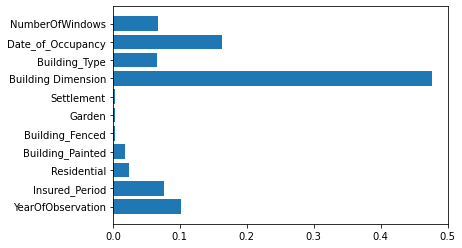

In [96]:
#let us look at the most important features here using 
rfc.feature_importances_
plt.barh(X.columns, rfc.feature_importances_)

<BarContainer object of 11 artists>

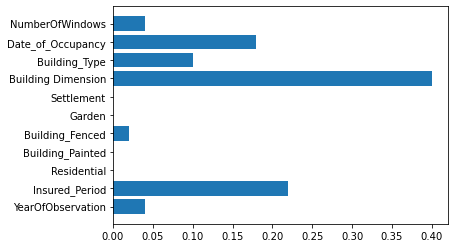

In [97]:
adc.feature_importances_
plt.barh(X.columns, adc.feature_importances_)

<BarContainer object of 11 artists>

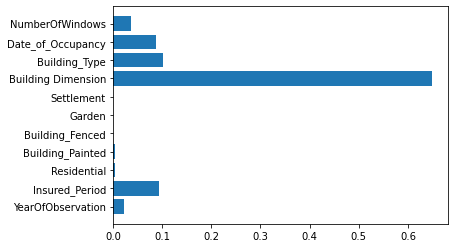

In [98]:
gbc.feature_importances_
plt.barh(X.columns, gbc.feature_importances_)

<BarContainer object of 11 artists>

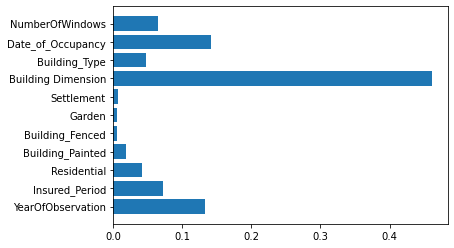

In [100]:
dtc.feature_importances_
plt.barh(X.columns, dtc.feature_importances_)

In [101]:
train.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,0,1,1,1,5.669881,1,1960,0,1053,0
1,H2037,2015,1.0,0,1,0,0,0,6.194405,1,1850,4,1053,0
2,H3802,2014,1.0,0,0,1,1,1,6.388561,1,1960,0,1053,0
3,H3834,2013,1.0,0,1,1,1,1,7.951559,1,1960,0,1053,0
4,H5053,2014,1.0,0,1,0,0,0,6.522093,1,1800,3,1053,0


In [102]:
#adding more features to our df 
train_df = train.copy()

<AxesSubplot:xlabel='Date_of_Occupancy'>

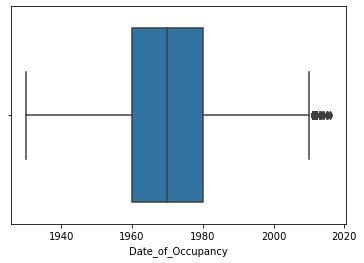

In [111]:
sns.boxplot(train_df.Date_of_Occupancy)

In [108]:
#let us remove these extreme outliers 
print(train_df.Date_of_Occupancy.quantile(0.90))
print(train_df.Date_of_Occupancy.quantile(0.10))

2000.0
1930.0


In [109]:
train.Date_of_Occupancy.median()

1970.0

In [110]:
train_df.Date_of_Occupancy = np.where(train_df.Date_of_Occupancy < 1930, 1970, train_df['Date_of_Occupancy'])



In [112]:
train_df['Building_Duration']= train_df['YearOfObservation']- train_df['Date_of_Occupancy']
train_df.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim,Building_Duration
0,H14663,2013,1.0,0,0,1,1,1,5.669881,1,1960,0,1053,0,53
1,H2037,2015,1.0,0,1,0,0,0,6.194405,1,1970,4,1053,0,45
2,H3802,2014,1.0,0,0,1,1,1,6.388561,1,1960,0,1053,0,54
3,H3834,2013,1.0,0,1,1,1,1,7.951559,1,1960,0,1053,0,53
4,H5053,2014,1.0,0,1,0,0,0,6.522093,1,1970,3,1053,0,44


<AxesSubplot:>

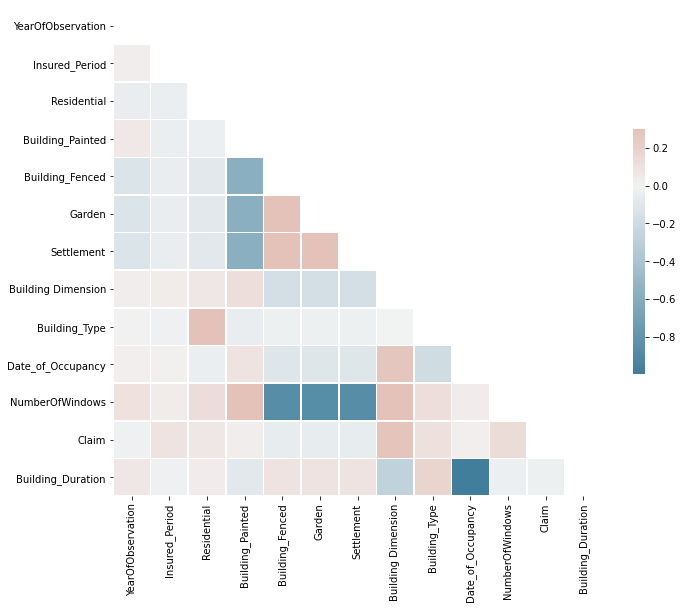

In [113]:
#lets check on correlation
#correlation heatmap 
# Compute the correlation matrix
corr = train_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})